In [2]:
import math
import os

import matplotlib.pyplot as plt
import numpy as np

In [15]:
source = 'networkrepository'  # SNAP or networkrepository

if source == 'SNAP':
    data_dir = os.path.expanduser('~/Documents/Datasets/temporal-networks-snap')
    name = 'CollegeMsg.txt'
    path = os.path.join(data_dir, name)
    with open(path, 'r') as f:
        lines = f.readlines()

    if name.endswith('tsv'):
        separator = '\t'
        lines = np.array([line.split(separator)[:3] for line in lines[1:]], dtype=np.str)
        vertex_id = {j : i for (i, j) in enumerate(lines.flatten())}
        lines = np.array([vertex_id[v] for v in lines.flatten()]).reshape(lines.shape)
        lines = np.array([[int(x) for x in line] for line in lines])
    else:
        if name.endswith('txt'):
            separator = ' '
        elif name.endswith('csv'):
            separator = ','
        lines = np.array([[int(x) for x in line.split(separator)[:3]] for line in lines])
else:
    data_dir = os.path.expanduser('~/Documents/Datasets/temporal-networks-network-repository')
    name = 'fb-forum'
    path = os.path.join(data_dir, name, name+'.edges')
    with open(path, 'r') as f:
        lines = f.readlines()
        
    if name == 'soc-sign-bitcoinalpha':
        lines = np.loadtxt(path, delimiter=',', dtype=np.int64)
        lines = np.concatenate((edges_all[:, :2], edges_all[:, 3:]), axis=1)
    elif name == 'fb-forum' or name == 'ia-contacts_hypertext2009':
        lines = np.loadtxt(path, delimiter=',', dtype=np.float64)
        lines = np.array(lines, dtype=np.int64)
    elif name == 'ia-contact':
        lines = [line.split('\t') for line in lines]
        lines = [[*line[0].split(), line[1].split()[1]] for line in lines]
        lines = np.array(lines, dtype=np.int64)
    elif name == 'ia-enron-employees':
        lines = [line.split() for line in lines]
        lines = [[line[0], line[1], line[3]] for line in lines]
        lines = np.array(lines, dtype=np.int64)
    elif name == 'ia-radoslaw-email' or name == 'soc-wiki-elec':
        lines = [line.split() for line in lines[2:]]
        lines = [[line[0], line[1], line[3]] for line in lines]
        lines = np.array(lines, dtype=np.int64)
        
lines = lines[lines[:, 2].argsort()]
    
m = len(lines)

In [16]:
arr_fraction_unique_test, arr_fraction_seen = [], []
splits = np.linspace(0.05, 0.95, 19)
static_train = set()
static_test = {(edge[0], edge[1]) for edge in lines}
cur = 0
for split in splits:
    idx = math.ceil(split*m)
    train, test = lines[:idx, :], lines[idx:, :]
    
    moving_edges = {(edge[0], edge[1]) for edge in lines[cur:idx]}
    staying_edges = {(edge[0], edge[1]) for edge in lines[idx:]}
    removals = moving_edges - staying_edges
    
    static_train.update(moving_edges)
    static_test = static_test - removals
    
    cur = idx
    
    # print('Split: {}'.format(split))
    # print('Number of temporal edges in train: {}'.format(len(train)))
    # print('Number of static edges in train: {}'.format(len(static_train)))
    # print('Number of temporal edges in test: {}'.format(len(temporal_test)))
    # print('Number of static edges in test: {}'.format(len(static_test)))
    
    # What is the fraction of unique edges in the test split?
    fraction_unique_test = len(static_test) / len(test)
    arr_fraction_unique_test.append(fraction_unique_test)
    # print('Fraction of unique edges in the test split: {:.3f}'.format(fraction_unique_test))
    
    # What fraction of test edges already exist in the train set?
    num_seen = np.sum([(edge in static_train) for edge in static_test])
    fraction_seen = num_seen / len(static_test)
    arr_fraction_seen.append(fraction_seen)
    # print('Fraction of test edges that exist in the train set: {:.3f}'.format(fraction_seen))

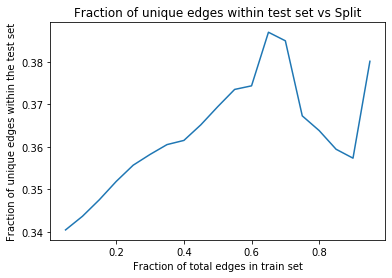

In [17]:
plt.xlabel('Fraction of total edges in train set')
plt.ylabel('Fraction of unique edges within the test set')
plt.title('Fraction of unique edges within test set vs Split')
plt.plot(splits, arr_fraction_unique_test)

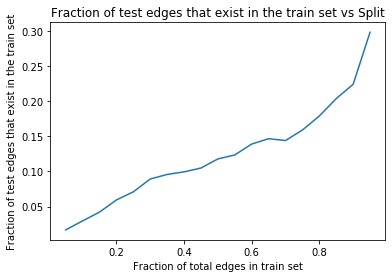

In [18]:
plt.xlabel('Fraction of total edges in train set')
plt.ylabel('Fraction of test edges that exist in the train set')
plt.title('Fraction of test edges that exist in the train set vs Split')
plt.plot(splits, arr_fraction_seen)